In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import illustris_python as il
import os

#For comparing
old_cat_path = "../data/tng-100-1/output"


In [2]:
def create_cat(path):
    df = pd.DataFrame()
    for filename in os.listdir(path):
        temp = pd.read_pickle(path + filename)
        df_temp = pd.concat([df, temp])
        df_temp = df_temp.sort_values(by="id") 
        df = df_temp.reset_index(drop=True)
    return df

In [3]:
test_name = "idun_3470641"
new_cat_path = "../data/tng-100-1/catalogues/kinematics_1102.pkl"
old_cat_lates = pd.read_pickle("../data/tng-100-1/cutdata/Subhalo_Centrals_minE9_5_SM_lateType_Gas.pkl")
old_cat_earlies = pd.read_pickle("../data/tng-100-1/cutdata/Subhalo_Centrals_minE9_5_SM_earlyType_Gas.pkl")
old_cat = pd.read_pickle("../data/tng-100-1/cutdata/Subhalo_Centrals_minE9_5_SM.pkl")
#new_cat = create_cat(new_cat_path)
new_cat = pd.read_pickle(new_cat_path)
#new_cat = new_cat[new_cat["SubhaloMassStellar"] > 0.32]
#MAsses
old_cat["SubhaloMassStellar"] = old_cat["SubhaloMassStellar"]*10**10
old_cat_earlies["SubhaloMassStellar"] = old_cat_earlies["SubhaloMassStellar"]*10**10
old_cat_lates["SubhaloMassStellar"] = old_cat_lates["SubhaloMassStellar"]*10**10
new_cat["SubhaloMassStellar"] = new_cat["SubhaloMassStellar"]*10**10
old_cat["SubhaloMassDM"] = old_cat["SubhaloMassDM"]*10**10
new_cat["SubhaloMass200"] = new_cat["SubhaloMass200"]*10**10
new_cat["SubhaloMassGas"] = new_cat["SubhaloMassGas"]*10**10

In [4]:
new_cat["SubhaloGasFraction"] = new_cat["SubhaloMassGas"]/new_cat["SubhaloMassStellar"]
new_cat_earlies = new_cat[new_cat["SubhaloGasFraction"] < 0.1]
new_cat_lates = new_cat[new_cat["SubhaloGasFraction"] > 0.1]

In [5]:
new_cat["SubhaloColor_g-i"] = new_cat["SubhaloStellarPhotometrics_g"] - new_cat["SubhaloStellarPhotometrics_i"]
new_cat_earlies["SubhaloColor_g-i"] = new_cat_earlies["SubhaloStellarPhotometrics_g"] - new_cat_earlies["SubhaloStellarPhotometrics_i"]
new_cat_lates["SubhaloColor_g-i"] = new_cat_lates["SubhaloStellarPhotometrics_g"] - new_cat_lates["SubhaloStellarPhotometrics_i"]
old_cat["SubhaloColor_g-i"] = old_cat["SubhaloStellarPhotometrics_g"] - old_cat["SubhaloStellarPhotometrics_i"]
old_cat_earlies["SubhaloColor_g-i"] = old_cat_earlies["SubhaloStellarPhotometrics_g"] - old_cat_earlies["SubhaloStellarPhotometrics_i"]
old_cat_lates["SubhaloColor_g-i"] = old_cat_lates["SubhaloStellarPhotometrics_g"] - old_cat_lates["SubhaloStellarPhotometrics_i"]

In [6]:
print(len(old_cat_earlies))
print(len(new_cat_earlies))
print(len(old_cat_lates))
print(len(new_cat_lates))

1818
777
4059
5078


In [7]:
new_cat_log = il.formatplot.log_formater(new_cat)
old_cat_log = il.formatplot.log_formater(old_cat)
new_cat_earlies_log = il.formatplot.log_formater(new_cat_earlies)
old_cat_earlies_log = il.formatplot.log_formater(old_cat_earlies)
new_cat_lates_log = il.formatplot.log_formater(new_cat_lates)
old_cat_lates_log = il.formatplot.log_formater(old_cat_lates)

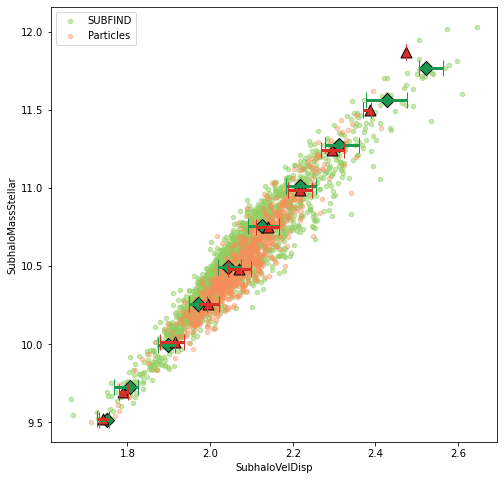

In [8]:
#Draw figure
fig1, axs1 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))

#Calculate median values + percentiles
mx_old, my_old, ex_old, ey_old = il.stats.median_values_log_y(old_cat_earlies, "tng", "SubhaloVelDisp", "SubhaloMassStellar", error_out=True)
ex_old, ey_old = il.stats.log_errors(ex_old, ey_old, mx_old, my_old)
mx_new, my_new, ex_new, ey_new = il.stats.median_values_log_y(new_cat_earlies, "tng", "SubhaloVelDisp", "SubhaloMassStellar", error_out=True)
ex_new, ey_new = il.stats.log_errors(ex_new, ey_new, mx_new, my_new)

#Plot all data points
old_cat_earlies_log.plot.scatter(x="SubhaloVelDisp", y = "SubhaloMassStellar",s=20, label="SUBFIND", alpha=0.5, color="#91cf60", ax = axs1)
new_cat_earlies_log.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassStellar",s=20, label="Particles", alpha=0.4, color="#fc8d59", ax = axs1)

#Plot median values + error bars
axs1.errorbar(np.log10(mx_old), np.log10(my_old), xerr=ex_old, capsize = 8, elinewidth=3, color="#1a9850", marker='^', fmt = 'none')
axs1.scatter(np.log10(mx_old), np.log10(my_old), marker='D', s=100, color="#1a9850", edgecolors = "black", label = "SUBFIND median")
axs1.errorbar(np.log10(mx_new), np.log10(my_new), xerr=ex_new, capsize = 8, elinewidth=3, color="#d73027", marker='^', fmt = 'none')
axs1.scatter(np.log10(mx_new), np.log10(my_new), marker='^', s=120, color="#d73027", edgecolors = "black", label = "Particle median")

#il.formatplot.VD_SM(ax = axs1, x0=1.8, x1=2.6, y0=9.5)

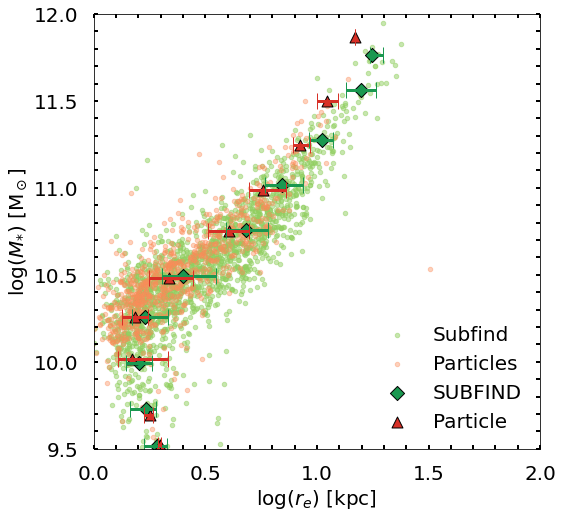

In [9]:
#Draw figure
fig4, axs4 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_cat_earlies_log.plot.scatter(x="SubhaloHalfmassRadStellar", y = "SubhaloMassStellar",s=20, label="Subfind", alpha=0.5, color="#91cf60", ax = axs4)
new_cat_earlies_log.plot.scatter(x="SubhaloHalfmassRadStellar", y="SubhaloMassStellar",s=20, label="Particles", alpha=0.4, color="#fc8d59", ax = axs4)

#Calculate median values + percentiles
mx_old, my_old, ex_old, ey_old = il.stats.median_values_log_y(old_cat_earlies, "tng", "SubhaloHalfmassRadStellar", "SubhaloMassStellar", error_out=True)
ex_old, ey_old = il.stats.log_errors(ex_old, ey_old, mx_old, my_old)
mx_new, my_new, ex_new, ey_new = il.stats.median_values_log_y(new_cat_earlies, "tng", "SubhaloHalfmassRadStellar", "SubhaloMassStellar", error_out=True)
ex_new, ey_new = il.stats.log_errors(ex_new, ey_new, mx_new, my_new)

#Plot median values + error bars
axs4.errorbar(np.log10(mx_old), np.log10(my_old), xerr=ex_old, capsize = 8, elinewidth=3, color="#1a9850", marker='^', fmt = 'none')
axs4.scatter(np.log10(mx_old), np.log10(my_old), marker='D', s=100, color="#1a9850", edgecolors = "black", label = r"SUBFIND")
axs4.errorbar(np.log10(mx_new), np.log10(my_new), xerr=ex_new, capsize = 8, elinewidth=3, color="#d73027", marker='^', fmt = 'none')
axs4.scatter(np.log10(mx_new), np.log10(my_new), marker='^', s=120, color="#d73027", edgecolors = "black", label = r"Particle")

il.formatplot.R_SM(ax = axs4, x0=0, y0=9.5)

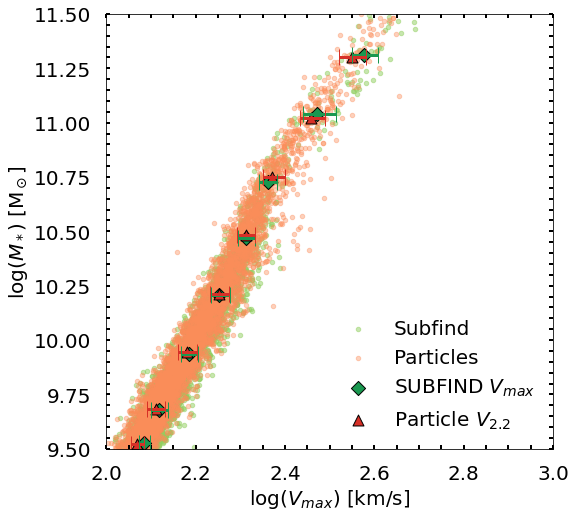

In [10]:
#Draw figure
fig2, axs2 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_cat_lates_log.plot.scatter(x="SubhaloVmax", y = "SubhaloMassStellar",s=20, label="Subfind", alpha=0.5, color="#91cf60", ax = axs2)
new_cat_lates_log.plot.scatter(x="SubhaloRotVel_2_2Re", y="SubhaloMassStellar",s=20, label="Particles", alpha=0.4, color="#fc8d59", ax = axs2)

#Calculate median values + percentiles
mx_old, my_old, ex_old, ey_old = il.stats.median_values_log_y(old_cat_lates, "tng", "SubhaloVmax", "SubhaloMassStellar", error_out=True)
ex_old, ey_old = il.stats.log_errors(ex_old, ey_old, mx_old, my_old)
mx_new, my_new, ex_new, ey_new = il.stats.median_values_log_y(new_cat_lates, "tng", "SubhaloRotVel_2_2Re", "SubhaloMassStellar", error_out=True)
ex_new, ey_new = il.stats.log_errors(ex_new, ey_new, mx_new, my_new)

#Plot median values + error bars
axs2.errorbar(np.log10(mx_old), np.log10(my_old), xerr=ex_old, capsize = 8, elinewidth=3, color="#1a9850", marker='^', fmt = 'none')
axs2.scatter(np.log10(mx_old), np.log10(my_old), marker='D', s=100, color="#1a9850", edgecolors = "black", label = r"SUBFIND $V_{max}$")
axs2.errorbar(np.log10(mx_new), np.log10(my_new), xerr=ex_new, capsize = 8, elinewidth=3, color="#d73027", marker='^', fmt = 'none')
axs2.scatter(np.log10(mx_new), np.log10(my_new), marker='^', s=120, color="#d73027", edgecolors = "black", label = r"Particle $V_{2.2}$")

il.formatplot.Vmax_SM(ax = axs2, x0= 2, x1=3, y0=9.5)

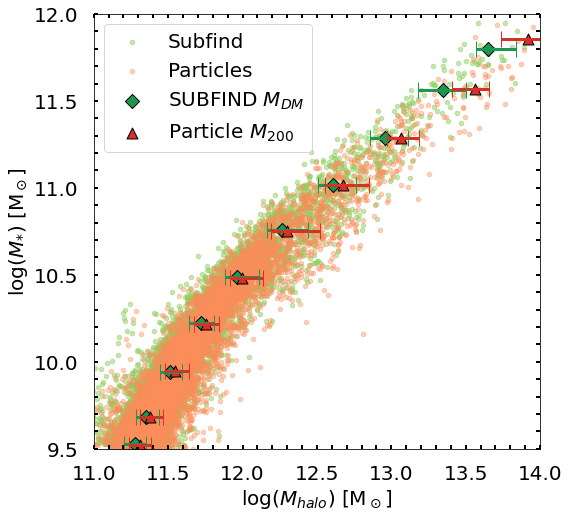

In [11]:
#Draw figure
fig3, axs3 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#Plot all data points
old_cat_log.plot.scatter(x="SubhaloMassDM", y = "SubhaloMassStellar",s=20, label="Subfind", alpha=0.5, color="#91cf60", ax = axs3)
new_cat_log.plot.scatter(x="SubhaloMass200", y="SubhaloMassStellar",s=20, label="Particles", alpha=0.4, color="#fc8d59", ax = axs3)

#Calculate median values + percentiles
mx_old, my_old, ex_old, ey_old = il.stats.median_values_log_y(old_cat, "tng", "SubhaloMassDM", "SubhaloMassStellar", error_out=True)
ex_old, ey_old = il.stats.log_errors(ex_old, ey_old, mx_old, my_old)
mx_new, my_new, ex_new, ey_new = il.stats.median_values_log_y(new_cat, "tng", "SubhaloMass200", "SubhaloMassStellar", error_out=True)
ex_new, ey_new = il.stats.log_errors(ex_new, ey_new, mx_new, my_new)

#Plot median values + error bars
axs3.errorbar(np.log10(mx_old), np.log10(my_old), xerr=ex_old, capsize = 8, elinewidth=3, color="#1a9850", marker='^', fmt = 'none')
axs3.scatter(np.log10(mx_old), np.log10(my_old), marker='D', s=100, color="#1a9850", edgecolors = "black", label = r"SUBFIND $M_{DM}$")
axs3.errorbar(np.log10(mx_new), np.log10(my_new), xerr=ex_new, capsize = 8, elinewidth=3, color="#d73027", marker='^', fmt = 'none')
axs3.scatter(np.log10(mx_new), np.log10(my_new), marker='^', s=120, color="#d73027", edgecolors = "black", label = r"Particle $M_{200}$")

il.formatplot.HM_SM(ax = axs3, y0=9.5)

In [17]:
print(old_cat["SubhaloColor_g-i"])

17185      1.05936
31342      1.07269
41582     0.612961
52618     0.990263
60731      1.08506
            ...   
689577     1.05972
696010     1.12601
704187     1.10072
719337     1.05939
727485     1.09481
Name: SubhaloColor_g-i, Length: 5877, dtype: object
